*simple linear regression*

In [84]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

In [85]:
#define the dataset
np.random.seed(42)
x = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)
true_salaries = np.array([30,35,40,45,50,55,60,65,70,75])

In [86]:
noise = np.random.normal(0,5,size=true_salaries.shape)
y = true_salaries+noise


In [87]:
#creating a linear regression model
model  = LinearRegression()

In [88]:
#training the model
model.fit(x,y)

LinearRegression()

In [89]:
#slope and intercept
intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


Intercept: 27.430065779800536
Coefficients: [4.96549814]


In [90]:
#displaying the line
print(f"Equation of the line: y = {coefficients[0]:.2f}x + {intercept:.2f}")

Equation of the line: y = 4.97x + 27.43


In [91]:
#predict values using the model
y_pred = model.predict(x)

In [92]:
y_pred

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

mean square error

In [94]:
#1.Mean Square Error (More sensitive for outliers)
mse=mean_squared_error(y,y_pred)
print(f"Mean Square Error(MSE):{mse:.2f}")

Mean Square Error(MSE):11.75


In [95]:
#2.Mean Absolute Error (Less sensitive for outliers)
mae=mean_absolute_error(y,y_pred)
print(f"Mean Absolute Error(MAE):{mae:.2f}")

Mean Absolute Error(MAE):2.87


In [96]:
#3.Root mean squared error()(avg magnitude of the errors)
rmse=np.sqrt(mse)
print(f"Root mean squared error(RMSE):{rmse:.2f}")

Root mean squared error(RMSE):3.43


In [97]:
#4.R^2-cal the accuracy of the model
r2=r2_score(y,y_pred)
print(f"R^2:{r2:.2f}")

R^2:0.95


In [98]:
#5.Adjusted R^2
n=len(y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-squared:{adj_r2:.2f}")

Adjusted R-squared:0.94


In [99]:
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
x_poly = poly.fit_transform(x)  # Transforming X to polynomial features


In [123]:
x_ols = sm.add_constant(x_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(y, x_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:13:07   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\HASINI\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


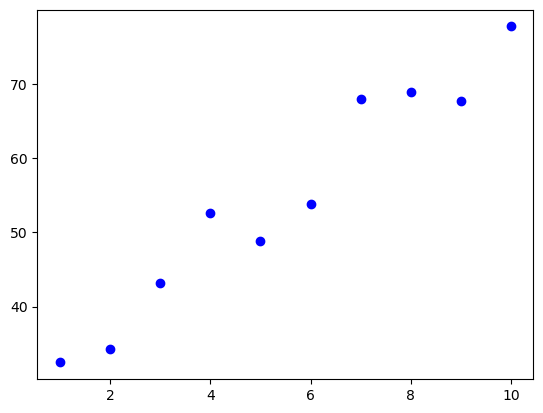

In [100]:
plt.scatter(x,y,color='blue',label='Actual Data')#Plot the actual data points


Text(0, 0.5, 'Salary')

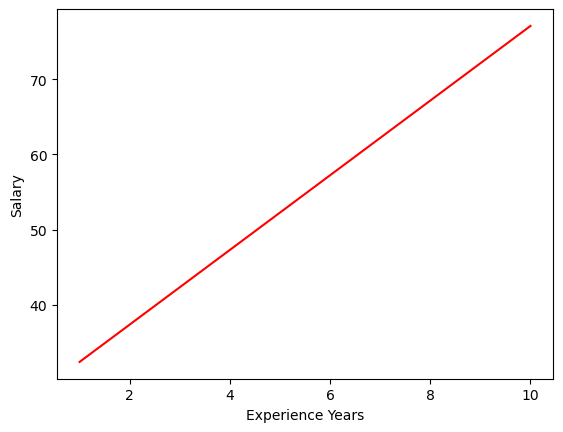

In [101]:
#plot the regression line
plt.plot(x,y_pred,color='red',label='Best Fit Line')
plt.xlabel('Experience Years')
plt.ylabel('Salary')

prediction feature

In [103]:
while True:
    try:
        exp= float(input("\nEnter years of experience to predict salary (or -1 to exit):"))
        if exp == -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"predicted salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid nummber!")


Enter years of experience to predict salary (or -1 to exit): -1


In [127]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
x_poly = poly.fit_transform(x)  # Transforming X to polynomial features
 
# Step 4: Create and train the Polynomial Regression model
model = LinearRegression()  # Initializing the model
model.fit(x_poly, y)  # Training the model

LinearRegression()